In [1]:
import tensorflow as tf

from keras import  layers, models
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten,Conv2D,MaxPooling2D


In [3]:
#creating a convolutional layer
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
Total params: 10,544
Trainable params: 10,544
Non-trainable params: 0
_________________________________________________

In [4]:
#creating dense layer

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [5]:
#   cost and optimization for the model

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [6]:
#  ImageDataGenerator used for preprocessing 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [8]:
training_set

In [9]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [11]:
#save the model histoy to hist
hist= model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 95s 7s/step - loss: 0.6677 - accuracy: 0.5673 - val_loss: 0.6909 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 95s 7s/step - loss: 0.5868 - accuracy: 0.6923 - val_loss: 0.9769 - val_accuracy: 0.3507
Epoch 3/50
13/13 [==============================] - 90s 7s/step - loss: 0.5125 - accuracy: 0.7188 - val_loss: 1.1547 - val_accuracy: 0.3881
Epoch 4/50
13/13 [==============================] - 89s 7s/step - loss: 0.4562 - accuracy: 0.7692 - val_loss: 0.9715 - val_accuracy: 0.4179
Epoch 5/50
13/13 [==============================] - 90s 7s/step - loss: 0.4472 - accuracy: 0.7572 - val_loss: 0.7568 - val_accuracy: 0.4328
Epoch 6/50
13/13 [==============================] - 90s 7s/step - loss: 0.4440 - accuracy: 0.7885 - val_loss: 0.6501 - val_accuracy: 0.6493
Epoch 7/50
13/13 [==============================] - 90s 7s/step - loss: 0.3794 - accuracy: 0.8245 - val_loss: 1.2621 - val_accuracy: 0.5299
Epoch 8/50
13/13 [==

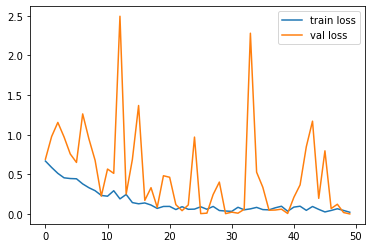

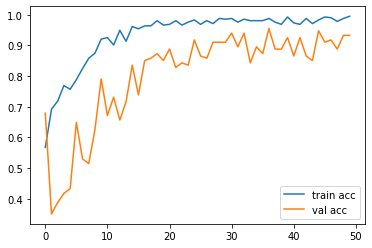

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
#checking the final loss and accuracy
score=model.evaluate(test_set)

5/5 [==============================] - 8s 2s/step


In [15]:
score

[1.7685469388961792, 0.9328358173370361]

In [16]:
hist.history['accuracy']

[0.5673077,
 0.6923077,
 0.71875,
 0.7692308,
 0.75721157,
 0.78846157,
 0.8245192,
 0.8581731,
 0.875,
 0.9206731,
 0.9254808,
 0.9014423,
 0.9495192,
 0.91346157,
 0.96153843,
 0.9543269,
 0.9639423,
 0.9639423,
 0.9807692,
 0.96634614,
 0.96875,
 0.9807692,
 0.96634614,
 0.97596157,
 0.9831731,
 0.96875,
 0.9807692,
 0.97115386,
 0.9879808,
 0.9855769,
 0.9879808,
 0.97596157,
 0.9855769,
 0.9807692,
 0.9807692,
 0.9807692,
 0.9879808,
 0.97596157,
 0.96875,
 0.99278843,
 0.9735577,
 0.96875,
 0.9879808,
 0.97115386,
 0.9831731,
 0.99278843,
 0.99038464,
 0.97836536,
 0.9879808,
 0.9951923]

In [17]:
from tensorflow.keras.models import load_model

model.save('model_detectt.h5')

In [18]:

y_pred = model.predict(test_set)

In [19]:
y_pred

array([[1.66798532e-01, 8.33201468e-01],
       [4.03564632e-01, 5.96435368e-01],
       [8.31353071e-04, 9.99168634e-01],
       [7.03716796e-05, 9.99929667e-01],
       [1.00000000e+00, 1.83010616e-15],
       [4.10109431e-01, 5.89890540e-01],
       [9.99999285e-01, 7.07297488e-07],
       [1.00000000e+00, 9.36246725e-09],
       [1.00000000e+00, 1.75054893e-14],
       [1.00000000e+00, 2.36059368e-08],
       [1.00000000e+00, 6.95345926e-23],
       [1.00000000e+00, 6.76386090e-16],
       [1.00000000e+00, 1.15822239e-27],
       [1.00000000e+00, 1.78959105e-08],
       [1.15862070e-02, 9.88413870e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.19853025e-16],
       [5.18781424e-04, 9.99481261e-01],
       [1.00000000e+00, 8.42076964e-11],
       [2.04336568e-04, 9.99795735e-01],
       [1.00000000e+00, 3.53720182e-08],
       [2.55739945e-03, 9.97442603e-01],
       [1.00462406e-03, 9.98995364e-01],
       [9.95342970e-01, 4.65703709e-03],
       [9.801098

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_detectt.h5')

In [24]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [26]:
x.shape


(224, 224, 3)

In [27]:
x=x/255

In [28]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

In [29]:



x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1], dtype=int64)

In [32]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
